In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [95]:
import io

YueWuFig3b = '''
Re,pth,pth_error
1.0,0.0513237169622618,0.0002199781121340043
0.99,0.046167477325244025,0.00010267156586033535
0.98,0.04151211738022634,0.00012443155910253338
0.97,0.03852923709230815,0.0001595666178409569
0.96,0.03648746712493118,0.000123136670273683
0.95,0.0347442062446983,0.00014682078797098765
0.9,0.029332515805398487,0.00012686807698223247
0.85,0.02584587855546878,9.786639121352197e-05
0.8,0.02316877334915777,7.68236144673428e-05
0.75,0.021151225550338177,7.118312250207618e-05
0.7,0.01943679864176918,0.00014624512170853123
0.65,0.018034254039008997,0.00010891011311434261
0.6,0.01669449633869318,7.115675561517082e-05
0.55,0.01574641788549999,0.00010720858073982528
0.5,0.01481415173945192,5.384187769403765e-05
0.44999999999999996,0.013956387668671555,8.61093781123726e-05
0.4,0.013211093981670873,7.76474612340557e-05
0.35,0.012647286931854143,0.00021557547566277476
0.30000000000000004,0.011960599832065578,5.514261964340448e-05
0.25,0.011438137804830493,8.096576997568077e-05
0.19999999999999996,0.010934709421606367,3.855016028203583e-05
0.15000000000000002,0.010514090086988132,4.488201984136989e-05
0.09999999999999998,0.010073535733615182,5.0829982013815125e-05
0.050000000000000044,0.009728747105915432,4.8315946070181574e-05
0.0,0.009372929252229647,3.349042376972427e-05
'''
csv_data = io.StringIO(YueWuFig3b)
data = np.genfromtxt(csv_data, delimiter=',', names=True)
Re = data['Re']
pth = data['pth']
pth_error = data['pth_error']

Text(0, 0.5, '$v$')

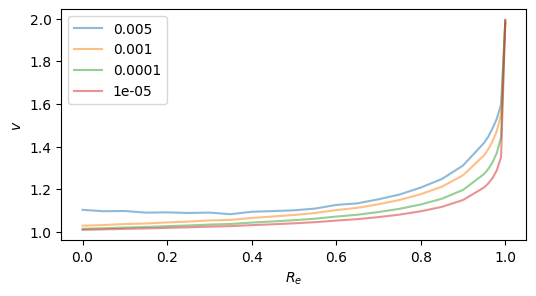

In [96]:
plt.figure(figsize=(6,3))
for p_tot in [5e-3,1e-3,1e-4,1e-5]:
    pe = p_tot * Re
    pp = p_tot-pe

    n = 2
    peff = ( ((pe/0.05)**2) **(1/n)
            +  ((pp/0.01)**1) **(1/n)
            ) ** n
            
    d_tot_mult = np.emath.logn(p_tot/pth, peff)
    plt.plot(Re,   d_tot_mult   ,label=rf"{p_tot}" ,alpha=0.5)
plt.xlabel(rf"$R_e$")
plt.legend()
plt.ylabel(rf"$v$")

# $p_{eff}$ cannot be a linear combination of $p_i$

Text(0, 0.5, '$v$')

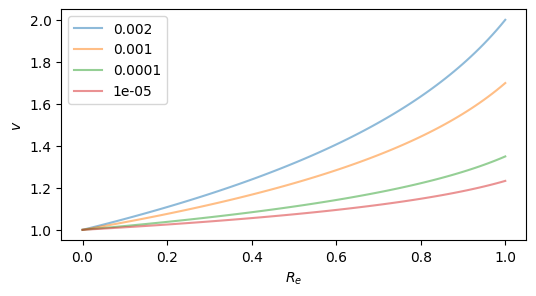

In [94]:
plt.figure(figsize=(6,3))
p_thre = 1e-2
for p_tot in [2e-3,1e-3,1e-4,1e-5]:
    weight = 0.2
    Re_arr = np.linspace(0,1,100)
    pe = p_tot * Re_arr
    pp = p_tot-pe
    peff = pp + pe * weight
    p_mult = peff / p_tot
    
    d_mult = 1 + np.emath.logn(p_tot/p_thre, p_mult)
    # plt.plot(Re_arr,   d_mult * (5+1)/2  ,label=rf"{p_tot}" ,alpha=0.5)
    plt.plot(Re_arr,   d_mult   ,label=rf"{p_tot}" ,alpha=0.5)
plt.xlabel(rf"$R_e$")
plt.legend()
plt.ylabel(rf"$v$")